In [1]:
#taking input from the load_train file
import pandas as pd
pd.options.mode.chained_assignment = None
file = open("loan_train.csv", "r")
dataset = pd.read_csv(file, sep = ",")
dataset = dataset.iloc[:,2:111]  

In [2]:
#taking input from the load_test file
file1 = open("loan_test.csv", "r")
dataset1 = pd.read_csv(file1, sep = ",")
dataset1 = dataset1.iloc[:,2:111]  

In [3]:
#converting the target attribute i.e,loan_status to 0 and 1 in train data file
empty_cols = [i for i in range(45,72)]   #more empty columns
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
data_with_loanstatus_sliced = dataset[(dataset['loan_status']=="Fully Paid") | (dataset['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})

In [4]:
#converting the target attribute i.e,loan_status to 0 and 1 in test data file
empty_cols1 = [i for i in range(45,72)]   #more empty columns
dataset1 = dataset1.drop(dataset1.columns[empty_cols1],axis=1)
data_with_loanstatus_sliced1 = dataset1[(dataset1['loan_status']=="Fully Paid") | (dataset1['loan_status']=="Charged Off")]
di1 = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
Dataset_withBoolTarget1= data_with_loanstatus_sliced1.replace({"loan_status": di1})

In [5]:
#shape of train data set
Dataset_withBoolTarget['loan_status'].value_counts()
print("Current shape of dataset :",Dataset_withBoolTarget.shape)
Dataset_withBoolTarget.head(4)

Current shape of dataset : (24301, 82)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10000,10000,9950.0,36 months,7.51%,311.11,A,A4,15,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,15000,15000,14800.0,36 months,8.94%,476.58,A,A5,1400,1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2000,2000,2000.0,36 months,13.57%,67.94,C,C3,36000,4 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,14000,14000,14000.0,60 months,17.49%,351.64,D,D5,old palm inc,5 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#shape of test data set
Dataset_withBoolTarget1['loan_status'].value_counts()
print("Current shape of dataset :",Dataset_withBoolTarget1.shape)
Dataset_withBoolTarget1.head(4)

Current shape of dataset : (14276, 82)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,4200,4200,4200.0,36 months,6.62%,128.96,A,A2,"PPG Industries, Inc.",6 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1325,1325,1325.0,36 months,13.49%,44.96,C,C2,PPI Technology Services,< 1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,10000,10000,9975.0,36 months,8.94%,317.72,A,A5,PPL Corporation,4 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,6000,6000,6000.0,60 months,16.49%,147.48,D,D3,ppl eu,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#removing attributes which ahve more than 21000 NAN's in train data set which contains 25000 data rows
dataset=Dataset_withBoolTarget.dropna(thresh = 21000,axis=1) #21000 is minimum number of non-NA values
print("Current shape of dataset :",dataset.shape)
Dataset_withBoolTarget

Current shape of dataset : (24301, 46)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10000,10000,9950.00000,36 months,7.51%,311.11,A,A4,15,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,15000,15000,14800.00000,36 months,8.94%,476.58,A,A5,1400,1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2000,2000,2000.00000,36 months,13.57%,67.94,C,C3,36000,4 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,14000,14000,14000.00000,60 months,17.49%,351.64,D,D5,old palm inc,5 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,12000,12000,11900.00000,36 months,8.94%,381.26,A,A5,Brocade Communications,7 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,5500,5500,5500.00000,36 months,14.96%,190.55,D,D2,PPDG,7 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
24995,11450,11450,11450.00000,36 months,8.49%,361.40,A,A5,PPG Industries,7 years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
24996,24000,24000,21100.31424,60 months,20.53%,642.96,G,G2,PPG Industries,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
24997,14000,14000,11411.12089,36 months,17.58%,503.19,F,F2,PPG Industries,10+ years,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#removing attributes which ahve more than 11000 NAN's in train data set which contains 15000 data rows
dataset1=Dataset_withBoolTarget1.dropna(thresh = 11000,axis=1) #21000 is minimum number of non-NA values
print("Current shape of dataset :",dataset1.shape)

Current shape of dataset : (14276, 46)


In [9]:
#deleting the columns which I felt have less importance and few invalid attributes from train data set
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan","delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] #deleting some more columns
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (24301, 28)


In [10]:
#deleting the columns which I felt have less importance and few invalid attributes from test data set
del_col_names1 = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan","delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] #deleting some more columns
dataset1 = dataset1.drop(labels = del_col_names1, axis = 1) 
print("Current shape of dataset :",dataset1.shape)

Current shape of dataset : (14276, 28)


In [11]:
#printing 4 units from the train data set after removing the mentioned attributes
dataset.head(4)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
0,10000,10000,9950.0,7.51%,311.11,A,A4,10+ years,RENT,30000.0,...,48,2247.210000,2235.98,1509.91,350.87,386.43,3.96,311.11,0.0,0.0
1,15000,15000,14800.0,8.94%,476.58,A,A5,1 year,RENT,147000.0,...,17,15112.760000,14911.26,15000.00,112.76,0.00,0.00,15114.03,0.0,0.0
2,2000,2000,2000.0,13.57%,67.94,C,C3,4 years,OWN,36000.0,...,10,2354.966827,2354.97,2000.00,354.97,0.00,0.00,101.78,0.0,0.0
4,14000,14000,14000.0,17.49%,351.64,D,D5,5 years,MORTGAGE,50000.0,...,27,20804.230020,20804.23,14000.00,6804.23,0.00,0.00,3943.27,0.0,0.0


In [12]:
#printing 4 units from the test data set after removing the mentioned attributes
dataset1.head(4)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
0,4200,4200,4200.0,6.62%,128.96,A,A2,6 years,RENT,69000.0,...,15,4642.374867,4642.37,4200.00,442.37,0.0,0.000,132.82,0.0,0.0
1,1325,1325,1325.0,13.49%,44.96,C,C2,< 1 year,RENT,24000.0,...,3,1476.640000,1476.64,1145.61,287.60,28.5,0.285,44.96,0.0,0.0
2,10000,10000,9975.0,8.94%,317.72,A,A5,4 years,MORTGAGE,75000.0,...,45,10287.347790,10261.63,10000.00,287.35,0.0,0.000,9337.10,0.0,0.0
3,6000,6000,6000.0,16.49%,147.48,D,D3,10+ years,RENT,60000.0,...,24,8848.343924,8848.34,6000.00,2848.34,0.0,0.000,147.02,0.0,0.0


In [13]:
#removing the % for the int_rate in train data set
dataset["int_rate"] = dataset["int_rate"].apply(lambda x:float(x[:-1]) ) #reomving % sign, conv to float  - int_rate column
dataset= dataset.reset_index(drop=True)
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (24301, 28)


In [14]:
#removing the % for the int_rate in test data set
dataset1["int_rate"] = dataset1["int_rate"].apply(lambda x:float(x[:-1]) ) #reomving % sign, conv to float  - int_rate column
dataset1= dataset1.reset_index(drop=True)
print("Current shape of dataset :",dataset1.shape)

Current shape of dataset : (14276, 28)


In [15]:
#taking most of the attributes leaving few from the remaining 28 attributes in train data set
features = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','emp_length','home_ownership','annual_inc','loan_status','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','recoveries','collection_recovery_fee','last_pymnt_amnt','pub_rec_bankruptcies','tax_liens']
Final_data = dataset[features]
Final_data= Final_data.reset_index(drop=True)
Final_data=Final_data.dropna()#dropping Nan
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (23815, 25)


In [16]:
#taking most of the attributes leaving few from the remaining 28 attributes in test data set
features1 = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','grade','emp_length','home_ownership','annual_inc','loan_status','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','recoveries','collection_recovery_fee','last_pymnt_amnt','pub_rec_bankruptcies','tax_liens']
Final_data1 = dataset1[features1]
Final_data1= Final_data1.reset_index(drop=True)
Final_data1=Final_data1.dropna()#dropping Nan
print("Current shape of dataset :",Final_data1.shape)

Current shape of dataset : (12985, 25)


In [17]:
#converting the data values to int so as to undergo fitting from train data set
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Final_data["emp_length"] = Final_data["emp_length"].apply(lambda x:int(x))
print("Current shape of dataset :",Final_data.shape)
Final_data.head()

Current shape of dataset : (23815, 25)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
0,10000,10000,9950.0,7.51,311.11,7,10,5,30000.0,1,...,48,2247.210000,2235.98,1509.91,350.87,386.43,3.96,311.11,0.0,0.0
1,15000,15000,14800.0,8.94,476.58,7,1,5,147000.0,0,...,17,15112.760000,14911.26,15000.00,112.76,0.00,0.00,15114.03,0.0,0.0
2,2000,2000,2000.0,13.57,67.94,5,4,4,36000.0,0,...,10,2354.966827,2354.97,2000.00,354.97,0.00,0.00,101.78,0.0,0.0
3,14000,14000,14000.0,17.49,351.64,4,5,6,50000.0,0,...,27,20804.230020,20804.23,14000.00,6804.23,0.00,0.00,3943.27,0.0,0.0
4,12000,12000,11900.0,8.94,381.26,7,7,6,294000.0,0,...,21,12344.811770,12241.94,12000.00,344.81,0.00,0.00,11204.30,0.0,0.0


In [18]:
#converting the data values to int so as to undergo fitting from test data set
Final_data1['grade'] = Final_data1['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data1["home_ownership"] = Final_data1["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
Final_data1["emp_length"] = Final_data1["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Final_data1["emp_length"] = Final_data1["emp_length"].apply(lambda x:int(x))
print("Current shape of dataset :",Final_data1.shape)
Final_data1.head()

Current shape of dataset : (12985, 25)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
0,4200,4200,4200.0,6.62,128.96,7,6,5,69000.0,0,...,15,4642.374867,4642.37,4200.00,442.37,0.0,0.000,132.82,0.0,0.0
1,1325,1325,1325.0,13.49,44.96,5,1,5,24000.0,1,...,3,1476.640000,1476.64,1145.61,287.60,28.5,0.285,44.96,0.0,0.0
2,10000,10000,9975.0,8.94,317.72,7,4,6,75000.0,0,...,45,10287.347790,10261.63,10000.00,287.35,0.0,0.000,9337.10,0.0,0.0
3,6000,6000,6000.0,16.49,147.48,4,10,5,60000.0,0,...,24,8848.343924,8848.34,6000.00,2848.34,0.0,0.000,147.02,0.0,0.0
4,25000,25000,25000.0,15.21,869.21,4,4,5,135000.0,0,...,44,31293.587380,31293.59,25000.00,6293.59,0.0,0.000,960.31,0.0,0.0


In [19]:
#removing the % for the revol_util in train data set
Final_data["revol_util"] = Final_data["revol_util"].apply(lambda x:float(x[:-1]) )
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (23815, 25)


In [20]:
#removing the % for the revol_util in test data set
Final_data1["revol_util"] = Final_data1["revol_util"].apply(lambda x:float(x[:-1]) )
Final_data1= Final_data1.reset_index(drop=True)
print("Current shape of dataset :",Final_data1.shape)

Current shape of dataset : (12985, 25)


In [21]:
#5 units of final train data which is to be used for fitting
Final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
0,10000,10000,9950.0,7.51,311.11,7,10,5,30000.0,1,...,48,2247.210000,2235.98,1509.91,350.87,386.43,3.96,311.11,0.0,0.0
1,15000,15000,14800.0,8.94,476.58,7,1,5,147000.0,0,...,17,15112.760000,14911.26,15000.00,112.76,0.00,0.00,15114.03,0.0,0.0
2,2000,2000,2000.0,13.57,67.94,5,4,4,36000.0,0,...,10,2354.966827,2354.97,2000.00,354.97,0.00,0.00,101.78,0.0,0.0
3,14000,14000,14000.0,17.49,351.64,4,5,6,50000.0,0,...,27,20804.230020,20804.23,14000.00,6804.23,0.00,0.00,3943.27,0.0,0.0
4,12000,12000,11900.0,8.94,381.26,7,7,6,294000.0,0,...,21,12344.811770,12241.94,12000.00,344.81,0.00,0.00,11204.30,0.0,0.0


In [22]:
#5 units of final test data which is to be used to evaluate
Final_data1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens
0,4200,4200,4200.0,6.62,128.96,7,6,5,69000.0,0,...,15,4642.374867,4642.37,4200.00,442.37,0.0,0.000,132.82,0.0,0.0
1,1325,1325,1325.0,13.49,44.96,5,1,5,24000.0,1,...,3,1476.640000,1476.64,1145.61,287.60,28.5,0.285,44.96,0.0,0.0
2,10000,10000,9975.0,8.94,317.72,7,4,6,75000.0,0,...,45,10287.347790,10261.63,10000.00,287.35,0.0,0.000,9337.10,0.0,0.0
3,6000,6000,6000.0,16.49,147.48,4,10,5,60000.0,0,...,24,8848.343924,8848.34,6000.00,2848.34,0.0,0.000,147.02,0.0,0.0
4,25000,25000,25000.0,15.21,869.21,4,4,5,135000.0,0,...,44,31293.587380,31293.59,25000.00,6293.59,0.0,0.000,960.31,0.0,0.0


In [23]:
#splitting the train data into X and Y
var_columns=[c for c in Final_data.columns if c not in ['loan_status']]
X=Final_data.loc[:,var_columns]
Y=Final_data.loc[:,'loan_status']

In [24]:
#splitting the test data into X and Y
var_columns1=[c for c in Final_data1.columns if c not in ['loan_status']]
X_test=Final_data1.loc[:,var_columns1]
Y_test=Final_data1.loc[:,'loan_status']

In [25]:
#considering validation where 80% data used for training and 20% for validation from train data
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape

((19052, 24), (4763, 24), (19052,), (4763,))

In [26]:
#creating a model using GradientBoostingClassifier and fitting X_train and Y_train 
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.01,max_depth=4,subsample=0.5,validation_fraction=0.1,n_iter_no_change=20,max_features='log2',verbose=1)
model.fit(X_train,Y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7768           0.0176            5.14s
         2           0.7822           0.0148            5.10s
         3           0.7794           0.0130            4.99s
         4           0.7500           0.0126            4.78s
         5           0.7293           0.0121            4.59s
         6           0.7546           0.0092            4.64s
         7           0.7324           0.0085            4.62s
         8           0.7131           0.0123            4.60s
         9           0.7002           0.0100            4.50s
        10           0.6965           0.0102            4.44s
        20           0.6166           0.0082            4.00s
        30           0.5533           0.0080            3.89s
        40           0.5017           0.0043            3.77s
        50           0.4536           0.0049            3.66s
        60           0.4095           0.0024            3.59s
       

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2',
                           n_estimators=500, n_iter_no_change=20, subsample=0.5,
                           verbose=1)

In [27]:
len(model.estimators_)

500

In [28]:
#calculating the predicted values and checking the accuracy on training,validation and test data sets
from sklearn.metrics import roc_auc_score
Y_train_pred = model.predict_proba(X_train)[:,1]
Y_valid_pred = model.predict_proba(X_valid)[:,1]
Y_test_pred=model.predict_proba(X_test)[:,1]
print("AUC Train :{:.4f}\nAUC Valid:{:.4f}\nAUC Test:{:.4f}".format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_valid,Y_valid_pred),roc_auc_score(Y_test,Y_test_pred)))

AUC Train :0.9992
AUC Valid:0.9974
AUC Test:0.9971


In [29]:
#hyperparameters preference wise list
pd.DataFrame({"Variable name":var_columns,"Importance":model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable name,Importance
19,recoveries,0.332166
20,collection_recovery_fee,0.269010
17,total_rec_prncp,0.143360
15,total_pymnt,0.041603
16,total_pymnt_inv,0.041467
1,funded_amnt,0.036750
21,last_pymnt_amnt,0.029657
0,loan_amnt,0.029332
2,funded_amnt_inv,0.027495
4,installment,0.023962


In [30]:
#extracting trees for train,test and validation so as to construct graph for accuracy with no of trees
import numpy as np
Y_train_pred_trees = np.stack(list(model.staged_predict_proba(X_train)))[:,:,1]
Y_valid_pred_trees = np.stack(list(model.staged_predict_proba(X_valid)))[:,:,1]
Y_test_pred_trees = np.stack(list(model.staged_predict_proba(X_test)))[:,:,1]
Y_train_pred_trees.shape, Y_valid_pred_trees.shape,Y_test_pred_trees.shape

((500, 19052), (500, 4763), (500, 12985))

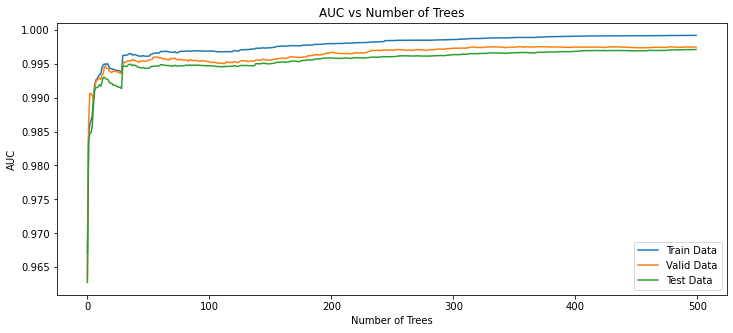

In [31]:
#plotting graph for train data,test data and valdiation data for num-of_trees and accuracy
import matplotlib.pylab as plt
auc_train_trees = [roc_auc_score(Y_train, Y_pred) for Y_pred in Y_train_pred_trees]
auc_valid_trees = [roc_auc_score(Y_valid, Y_pred) for Y_pred in Y_valid_pred_trees]
auc_test_trees = [roc_auc_score(Y_test, Y_pred) for Y_pred in Y_test_pred_trees]
plt.figure(figsize=(12,5))

plt.plot(auc_train_trees, label='Train Data')
plt.plot(auc_valid_trees, label='Valid Data')
plt.plot(auc_test_trees, label='Test Data')
plt.title('AUC vs Number of Trees')
plt.ylabel('AUC')
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

In [32]:
#finding the accuracy with decision tree classifier for the same set of test data
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion = "entropy",random_state = 10,max_depth=4).fit(X_train,Y_train)
clf_dt.score(X_test,Y_test)

0.9862918752406623